### what do we want in a box score?

In [ ]:
#total stats and per-point-played stats
#from left to right
#name,position
#points played (o/d)
#touches, +/-, goals, assists, hockey assists, d's, turns
#yardage gained (throw/rec)
#score rate
#team totals at the bottom

In [ ]:
#determine the qualifier between o points and d points
#how many more yards are gained on o points than d points
#can use this as some sort of measuring stick to qualify players offensive performance

#automatically categorize handlers, cutters, and flex by some formula of their data
#automatically categorize offense and defense players by some formula of their data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pdb import set_trace
import glob

### COMBINE GAMExGAME POSSESSION DATA INTO ONE POSS_DF

In [14]:
#give file path abbreviation
poss_path_abbr = '/Users/maxcohen/Documents/Blueprint Stats/Possessions vs.*.csv'
#create list of files that match the possession convention
file_list = glob.glob(poss_path_abbr)
#create an empty df
poss_df = pd.DataFrame()
#loop through each file in the list
for file in file_list:
    #add an oppnent depending on the name of the file
    opponent = file.split('vs. ')[1].split(' 2019')[0]
    df_ = pd.read_csv(file)
    #add oppenent name column
    df_['opponent'] = opponent
    #append file to the overall poss_df
    poss_df = poss_df.append(df_)

### COMBINE GAMExGAME PASSES DATA INTO ONE PASSES_DF

In [15]:
#give file path abbreviation
passes_path_abbr = '/Users/maxcohen/Documents/Blueprint Stats/Passes vs.*.csv'
#create list of files that match the passes convention
file_list = glob.glob(passes_path_abbr)
#create an empty df
passes_df = pd.DataFrame()
#loop through each file in the list
for file in file_list:
    #add an oppnent depending on the name of the file
    opponent = file.split('vs. ')[1].split(' 2019')[0]
    df_ = pd.read_csv(file)
    #add oppenent name column
    df_['opponent'] = opponent
    #append file to the overall passes_df
    passes_df = passes_df.append(df_)

#remove all of the empty data with no thrower nor reciever
passes_df = passes_df.dropna(subset=['Thrower', 'Receiver'])

### MERGE THE PASSES_DF WITH THE POSS_DF

In [19]:
full_poss_df = pd.merge(passes_df,poss_df,how='left',on=['Point','Possession','opponent'],copy=False)
full_poss_df = full_poss_df.reset_index(drop=True)
full_poss_df = full_poss_df.drop(columns=['Created_y','Start X (0 -> 1 = left sideline -> right sideline)_y',
                  'Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)_y'])
full_poss_df.to_csv('/Users/maxcohen/Documents/Blueprint Stats/BP_2019_Full_Possession_Data.csv')

In [49]:
full_poss_df.columns = [x.replace('_x','') for x in full_poss_df.columns]

In [116]:
full_poss_df.columns

Index(['Created', 'Point', 'Possession', 'Thrower', 'Receiver', 'Turnover?',
       'Thrower error?', 'Receiver error?', 'Throw to endzone?', 'Assist?',
       'Secondary assist?', 'Huck?', 'Swing?', 'Dump?', 'From sideline?',
       'To sideline?', 'Distance (m)', 'Forward distance (m)',
       'Left-to-right distance (m)',
       'Start X (0 -> 1 = left sideline -> right sideline)',
       'Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'End X (0 -> 1 = left sideline -> right sideline)',
       'End Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'opponent', 'Started point on offense?', 'Scored?', 'Initiator',
       'Passes', 'Secondary assist', 'Assist', 'Goal', 'Thrower error',
       'Receiver error', 'Stalled out'],
      dtype='object')

In [130]:
full_poss_df['opponent'].unique()

array(['Lost  Boys', 'HIP', 'Vault', 'Big Wrench', 'Citywide', 'Shade',
       'Red Circus', 'El Nino', 'Floodwall', 'Lantern'], dtype=object)

In [118]:
opponent_grp = full_poss_df.groupby(['opponent'])

In [120]:
opponent_grp.get_group('Citywide')

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,Started point on offense?,Scored?,Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out
494,2020-02-17 15:52:29,2,1,Evan Ma,Owen Marschall,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
495,2020-02-17 15:52:33,2,1,Owen Marschall,Evan Ma,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
496,2020-02-17 15:52:41,2,1,Evan Ma,Owen Marschall,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
497,2020-02-17 15:52:50,2,1,Owen Marschall,Max Cohen,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
498,2020-02-17 15:52:54,2,1,Max Cohen,Ian McInerney,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2020-02-17 16:24:23,19,1,Victor Kao,Nadav Pearl,0,0,0,0,0,...,0,1,Nadav Pearl,8,Victor Kao,Nadav Pearl,Josh Imhoff,NaN,NaN,NaN
579,2020-02-17 16:24:27,19,1,Nadav Pearl,Josh Imhoff,0,0,0,1,1,...,0,1,Nadav Pearl,8,Victor Kao,Nadav Pearl,Josh Imhoff,NaN,NaN,NaN
580,2020-02-17 16:25:52,20,1,Ruozhou Ye,Jesse Gan,0,0,0,0,0,...,0,1,Ruozhou Ye,3,Jesse Gan,Geo Zheng,Swan,NaN,NaN,NaN
581,2020-02-17 16:25:54,20,1,Jesse Gan,Geo Zheng,0,0,0,0,0,...,0,1,Ruozhou Ye,3,Jesse Gan,Geo Zheng,Swan,NaN,NaN,NaN


In [133]:
opponent_grp['Receiver'].value_counts(normalize=True).head(300).loc['Red Circus']

Receiver
Victor Kao        0.179487
Max Cohen         0.170940
Carter Thallon    0.102564
Eliot Bemis       0.076923
Sam Pollack       0.076923
Jeff Voss         0.051282
Owen Marschall    0.051282
Andrew Edelman    0.042735
Geo Zheng         0.042735
Gabe Stump        0.034188
Odie              0.034188
Ruozhou Ye        0.025641
Sam Feder         0.025641
Carter Wang       0.017094
Jon Kwan          0.017094
Towell            0.017094
Ian McInerney     0.008547
Josh Imhoff       0.008547
Stouf             0.008547
Swan              0.008547
Name: Receiver, dtype: float64

In [137]:
opponent_grp['Passes'].agg(['median','mean']).loc['Citywide']

median    8.000000
mean      8.573034
Name: Citywide, dtype: float64

In [350]:
full_poss_df

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,Started point on offense?,Scored?,Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out
0,2020-02-26 22:56:29,1,1,Evan Ma,Max Cohen,0,0,0,0,0,...,1,1,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN
1,2020-02-26 22:56:39,1,1,Max Cohen,Victor Kao,0,0,0,0,0,...,1,1,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN
2,2020-02-26 22:56:46,1,1,Victor Kao,Carter Thallon,0,0,0,0,0,...,1,1,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN
3,2020-02-26 22:56:49,1,1,Carter Thallon,Odie,0,0,0,0,0,...,1,1,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN
4,2020-02-26 22:56:55,1,1,Odie,Carter Thallon,0,0,0,0,0,...,1,1,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,2020-02-18 19:01:10,14,1,Owen Marschall,Max Cohen,0,0,0,0,0,...,1,1,Owen Marschall,5,Jeff Voss,Carter Thallon,Odie,NaN,NaN,NaN
1159,2020-02-18 19:01:19,14,1,Max Cohen,Sam Pollack,0,0,0,0,0,...,1,1,Owen Marschall,5,Jeff Voss,Carter Thallon,Odie,NaN,NaN,NaN
1160,2020-02-18 19:01:25,14,1,Sam Pollack,Jeff Voss,0,0,0,0,0,...,1,1,Owen Marschall,5,Jeff Voss,Carter Thallon,Odie,NaN,NaN,NaN
1161,2020-02-18 19:01:29,14,1,Jeff Voss,Carter Thallon,0,0,0,0,0,...,1,1,Owen Marschall,5,Jeff Voss,Carter Thallon,Odie,NaN,NaN,NaN


<BarContainer object of 17 artists>

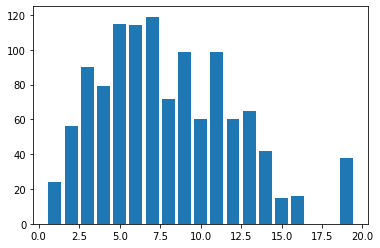

In [349]:
from collections import Counter
pass_count_list = sorted(full_poss_df['Passes'])
c = Counter(pass_count_list)
plt.bar(c.keys(),c.values())

In [330]:
most_passes = full_poss_df['Passes'].max()
full_poss_df[full_poss_df['Passes'] == most_passes]

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,Started point on offense?,Scored?,Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out
868,2020-02-27 22:02:48,9,1,Evan Ma,Max Cohen,0,0,0,0,0,...,1,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN
869,2020-02-27 22:02:54,9,1,Max Cohen,Victor Kao,0,0,0,0,0,...,1,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN
870,2020-02-27 22:02:59,9,1,Victor Kao,Max Cohen,0,0,0,0,0,...,1,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN
871,2020-02-27 22:03:04,9,1,Max Cohen,Victor Kao,0,0,0,0,0,...,1,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN
872,2020-02-27 22:03:09,9,1,Victor Kao,Ian McInerney,0,0,0,0,0,...,1,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN
873,2020-02-27 22:03:15,9,1,Ian McInerney,Max Cohen,0,0,0,0,0,...,1,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN
874,2020-02-27 22:03:23,9,1,Max Cohen,Victor Kao,0,0,0,0,0,...,1,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN
875,2020-02-27 22:03:26,9,1,Victor Kao,Evan Ma,0,0,0,0,0,...,1,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN
876,2020-02-27 22:03:43,9,1,Evan Ma,Max Cohen,0,0,0,0,0,...,1,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN
877,2020-02-27 22:03:48,9,1,Max Cohen,Victor Kao,0,0,0,0,0,...,1,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN


### ADD ALL GAMES DF

In [16]:
games_file = '/Users/maxcohen/Documents/Blueprint Stats/Blueprint 2019 Games.csv'
games_df = pd.read_csv(games_file)
games_df

,Created,Opponent,Date,Time,Wind speed (km/h),Our score,Opponent's score,Result,Won points started on offense (holds),Won points started on defense (breaks),...,Offense possessions,Defense possessions,Passes,Turnovers,Thrower errors,Receiver errors,Defensive blocks,Opposition errors,Stall outs for,Stall outs against
0,2020-02-27 21:50:28,El Nino,2019-08-10,16:00,9,7,12,Loss,7,0,...,16,2,133,11,10,3,2,4,0,0
1,2020-02-25 08:44:38,Shade,2019-09-08,14:00,10,15,9,Win,6,9,...,17,14,132,16,11,6,14,6,1,0
2,2020-02-17 22:44:32,Red Circus,2019-09-21,14:00,9,9,11,Loss,7,2,...,14,8,122,13,11,5,8,4,0,0
3,2020-02-18 22:12:16,Big Wrench,2019-09-22,12:00,9,13,7,Win,7,6,...,15,16,144,18,16,6,12,11,0,0
4,2020-02-28 07:49:25,Vault,2019-08-11,14:00,13,8,14,Loss,7,1,...,14,5,124,11,11,0,3,4,0,0
5,2020-02-18 18:39:18,Lantern,2019-09-22,14:38,8,8,6,Win,6,2,...,13,2,68,7,6,4,4,4,0,0
6,2020-02-26 08:50:12,Floodwall,2019-08-10,09:30,11,13,8,Win,8,5,...,17,8,135,12,12,1,11,5,0,0
7,2020-02-26 20:23:19,HIP,2019-08-11,10:00,9,10,9,Win,6,4,...,10,9,110,9,9,0,7,4,0,0
8,2020-02-17 15:47:13,Citywide,2019-08-10,15:00,8,13,7,Win,7,6,...,9,8,89,4,4,0,5,4,0,0
9,2020-02-26 22:55:49,Lost Boys,2019-08-10,00:00,9,8,6,Win,3,5,...,8,11,116,11,10,3,6,7,0,0


### ADD PLAYER STATS DF

In [186]:
player_stats_file = '/Users/maxcohen/Documents/Blueprint Stats/Blueprint 2019 Players.csv'
player_stats_df = pd.read_csv(player_stats_file)
player_stats_df

,Player,Points played total,Offense points played,Defense points played,Offense points won,Defense points won,Touches,Points played with touches,Throws,Catches,...,Stall outs for,Stall outs against,Total completed throw distance (m),Total completed throw gain (m),Average completed throw distance (m),Average completed throw gain (m),Total caught pass distance (m),Total caught pass gain (m),Average caught pass distance (m),Average caught pass gain (m)
0,Sam Alston,47,7,40,4,13,22,17,15,20,...,0,0,132.50,33.05,10.19,2.54,399.95,324.93,20.00,16.25
1,Eliot Bemis,52,45,7,32,3,54,35,45,53,...,0,0,615.97,392.37,14.32,9.12,851.24,681.43,16.06,12.86
2,Josh Imhoff,39,4,35,3,13,25,16,19,24,...,0,0,200.30,46.75,11.13,2.60,436.23,327.54,18.18,13.65
3,Victor Kao,55,52,3,33,2,98,46,96,79,...,0,0,"1,103.12",631.78,12.98,7.43,934.02,283.40,11.82,3.59
4,Ben West,8,0,8,0,2,1,1,1,1,...,0,0,12.35,2.26,12.35,2.26,19.60,19.28,19.60,19.28
5,Alon Brown,36,2,34,2,14,39,18,38,25,...,0,0,519.84,245.62,15.29,7.22,270.79,37.92,10.83,1.52
6,Jeff Voss,63,59,4,44,1,62,42,54,62,...,0,0,619.62,312.71,13.77,6.95,"1,062.67",759.53,17.14,12.25
7,Ian McInerney,42,23,19,17,7,33,21,28,33,...,0,0,293.24,149.15,11.73,5.97,495.10,373.45,15.00,11.32
8,Zero,33,3,30,3,15,10,8,9,9,...,0,0,100.23,26.62,11.14,2.96,127.80,84.82,14.20,9.42
9,Sam Pollack,64,63,1,41,0,54,41,49,54,...,0,0,635.76,263.91,13.24,5.50,835.63,640.18,15.47,11.86


In [189]:
#change all columns to numeric
column_list = ['Total completed throw distance (m)','Total completed throw gain (m)',
                 'Total caught pass distance (m)']
for i in column_list:
    player_stats_df[i] = [x.replace(',','') for x in player_stats_df[i]]
    player_stats_df[i] = pd.to_numeric(player_stats_df[i])             

In [191]:
player_stats_df = player_stats_df.set_index('Player')

In [238]:
player_stats_df.dtypes

Points played total                       int64
Offense points played                     int64
Defense points played                     int64
Offense points won                        int64
Defense points won                        int64
Touches                                   int64
Points played with touches                int64
Throws                                    int64
Catches                                   int64
Possessions initiated                     int64
Assists                                   int64
Secondary assists                         int64
Goals                                     int64
Turnovers                                 int64
Thrower errors                            int64
Receiver errors                           int64
Defensive blocks                          int64
Stall outs for                            int64
Stall outs against                        int64
Total completed throw distance (m)      float64
Total completed throw gain (m)          

In [192]:
#create a column for "handler/cutter"
position_df = pd.DataFrame(columns=['Player','Position'])

In [193]:
position_df['Player'] = list(player_stats_df.index)

In [194]:
position_df['Position'] = ['C','C','C','H','C','H','C','C','C','C','H','C','C','H','C','C','H','C','H','H','C','C',
                          'H','C','C','H','C','H']

In [232]:
player_stats_df['percent_Opp'] = player_stats_df['Offense points played'] / player_stats_df['Points played total']

In [246]:
player_stats_df['Line'] = ['Off' if x >= .66 else 'def' if x < .33 else 'Flex' 
                           for x in player_stats_df['percent_Opp']]

In [247]:
player_stats_df['Line']

Player
Sam Alston          def
Eliot Bemis         Off
Josh Imhoff         def
Victor Kao          Off
Ben West            def
Alon Brown          def
Jeff Voss           Off
Ian McInerney      Flex
Zero                def
Sam Pollack         Off
Owen Marschall      Off
Towell              def
Swan                def
Andrew Edelman      def
Jon Kwan            def
Carter Thallon      Off
Evan Ma             Off
Stouf               def
Nadav Pearl         def
Ruozhou Ye          def
Jesse Gan           def
Sam Feder           def
Juleon Robinson     def
Odie                Off
Carter Wang         def
Max Cohen           Off
Gabe Stump          Off
Geo Zheng          Flex
Name: Line, dtype: object

In [195]:
position_df = position_df.set_index('Player')

In [196]:
player_stats_df = player_stats_df.join(position_df)

### PLUS MINUS TABLE 

In [197]:
player_stats_df['plus/minus'] = player_stats_df['Goals'] + player_stats_df['Assists'] + \
player_stats_df['Secondary assists']*.5 + player_stats_df['Defensive blocks'] - player_stats_df['Turnovers']

In [207]:
player_stats_df['offense_plus/minus'] = player_stats_df['Goals'] + player_stats_df['Assists'] + \
player_stats_df['Secondary assists']*.5 - player_stats_df['Turnovers']

In [296]:
plus_minus = player_stats_df[['Position','Line','Touches','plus/minus','Goals','Assists',
                 'Secondary assists','Defensive blocks','Turnovers']].sort_values(by='plus/minus',ascending=False)
plus_minus

,Position,Line,Touches,plus/minus,Goals,Assists,Secondary assists,Defensive blocks,Turnovers
Player,,,,,,,,,
Ruozhou Ye,H,def,83,21.5,6,12,5,7,6
Eliot Bemis,C,Off,54,16.5,9,7,7,1,4
Owen Marschall,H,Off,98,12.0,7,3,0,5,3
Odie,C,Off,82,12.0,10,12,4,4,16
Sam Alston,C,def,22,11.0,7,2,0,4,2
Josh Imhoff,C,def,25,11.0,6,2,2,3,1
Geo Zheng,H,Flex,54,10.5,4,3,3,7,5
Carter Thallon,C,Off,53,9.5,3,8,5,0,4
Sam Pollack,C,Off,54,9.5,5,4,5,1,3


In [249]:
offense_plus_minus = player_stats_df[['Position','Line','offense_plus/minus','Goals','Assists','Secondary assists',
                                      'Turnovers']].sort_values(by='offense_plus/minus',ascending=False)
offense_plus_minus

,Position,Line,offense_plus/minus,Goals,Assists,Secondary assists,Turnovers
Player,,,,,,,
Eliot Bemis,C,Off,15.5,9,7,7,4
Ruozhou Ye,H,def,14.5,6,12,5,6
Carter Thallon,C,Off,9.5,3,8,5,4
Sam Pollack,C,Off,8.5,5,4,5,3
Josh Imhoff,C,def,8.0,6,2,2,1
Odie,C,Off,8.0,10,12,4,16
Sam Alston,C,def,7.0,7,2,0,2
Max Cohen,H,Off,7.0,2,11,12,12
Owen Marschall,H,Off,7.0,7,3,0,3


In [200]:
player_stats_df['Turnovers'].sum()

122

In [203]:
player_stats_df['Total completed throw distance (m)'].sum() / player_stats_df['Turnovers'].sum()

118.75573770491803

### TOTAL DISTANCE TABLE

In [213]:
player_stats_df['dist_throw/turn'] = player_stats_df['Total completed throw distance (m)'] / \
player_stats_df['Thrower errors']

player_stats_df['dist_rec/turn'] = player_stats_df['Total caught pass distance (m)'] / \
player_stats_df['Receiver errors']

In [220]:
player_stats_df['total_dist'] = player_stats_df['Total completed throw distance (m)'] + \
player_stats_df['Total caught pass distance (m)']

player_stats_df['total_dist/turn'] = player_stats_df['total_dist'] / player_stats_df['Turnovers']

In [222]:
player_stats_df[['total_dist','total_dist/turn','dist_throw/turn',
                 'dist_rec/turn']].sort_values(by='total_dist/turn', ascending=False)

,total_dist,total_dist/turn,dist_throw/turn,dist_rec/turn
Player,,,,
Ben West,31.95,inf,inf,inf
Nadav Pearl,151.19,inf,inf,inf
Zero,228.03,inf,inf,inf
Josh Imhoff,636.53,636.530000,200.300000,inf
Owen Marschall,1770.21,590.070000,1073.900000,348.155
Sam Pollack,1471.39,490.463333,635.760000,417.815
Jon Kwan,443.73,443.730000,180.750000,inf
Eliot Bemis,1467.21,366.802500,307.985000,425.620
Carter Thallon,1352.55,338.137500,200.036667,752.440


In [224]:
player_stats_df.dtypes

Points played total                       int64
Offense points played                     int64
Defense points played                     int64
Offense points won                        int64
Defense points won                        int64
Touches                                   int64
Points played with touches                int64
Throws                                    int64
Catches                                   int64
Possessions initiated                     int64
Assists                                   int64
Secondary assists                         int64
Goals                                     int64
Turnovers                                 int64
Thrower errors                            int64
Receiver errors                           int64
Defensive blocks                          int64
Stall outs for                            int64
Stall outs against                        int64
Total completed throw distance (m)      float64
Total completed throw gain (m)          

### TOTAL GAIN TABLE 

In [226]:
player_stats_df['gain_throw/turn'] = player_stats_df['Total completed throw gain (m)'] / \
player_stats_df['Thrower errors']

player_stats_df['gain_rec/turn'] = player_stats_df['Total caught pass gain (m)'] / \
player_stats_df['Receiver errors']

In [227]:
player_stats_df['total_gain'] = player_stats_df['Total completed throw gain (m)'] + \
player_stats_df['Total caught pass gain (m)']

player_stats_df['total_gain/turn'] = player_stats_df['total_gain'] / player_stats_df['Turnovers']

In [298]:
player_stats_df[['total_gain','Total completed throw gain (m)','Total caught pass gain (m)',
                 'total_gain/turn','gain_throw/turn',
                 'gain_rec/turn']].sort_values(by='total_gain', ascending=False)

,total_gain,Total completed throw gain (m),Total caught pass gain (m),total_gain/turn,gain_throw/turn,gain_rec/turn
Player,,,,,,
Max Cohen,1856.00,1496.82,359.18,154.666667,124.735000,inf
Odie,1279.52,490.11,789.41,79.970000,40.842500,197.352500
Andrew Edelman,1124.65,1107.56,17.09,93.720833,100.687273,17.090000
Eliot Bemis,1073.80,392.37,681.43,268.450000,196.185000,340.715000
Jeff Voss,1072.24,312.71,759.53,134.030000,44.672857,759.530000
Ruozhou Ye,963.21,732.77,230.44,160.535000,244.256667,76.813333
Victor Kao,915.18,631.78,283.40,91.518000,70.197778,283.400000
Sam Pollack,904.09,263.91,640.18,301.363333,263.910000,320.090000
Owen Marschall,713.49,583.55,129.94,237.830000,583.550000,64.970000


In [231]:
player_stats_df['total_gain/turn'].median()

132.34

### SCORE RATE TABLE

In [252]:
player_stats_df.columns

Index(['Points played total', 'Offense points played', 'Defense points played',
       'Offense points won', 'Defense points won', 'Touches',
       'Points played with touches', 'Throws', 'Catches',
       'Possessions initiated', 'Assists', 'Secondary assists', 'Goals',
       'Turnovers', 'Thrower errors', 'Receiver errors', 'Defensive blocks',
       'Stall outs for', 'Stall outs against',
       'Total completed throw distance (m)', 'Total completed throw gain (m)',
       'Average completed throw distance (m)',
       'Average completed throw gain (m)', 'Total caught pass distance (m)',
       'Total caught pass gain (m)', 'Average caught pass distance (m)',
       'Average caught pass gain (m)', 'Position', 'plus/minus',
       'dist_throw/turn', 'offense_plus/minus', 'dist_rec/turn', 'total_dist',
       'total_dist/turn', 'gain_throw/turn', 'gain_rec/turn', 'total_gain',
       'total_gain/turn', 'percent_Opp', 'Line', 'O_score_rate',
       'd_score_rate', 'total_score_rate']

In [251]:
player_stats_df['O_score_rate'] = player_stats_df['Offense points won'] / \
player_stats_df['Offense points played']

player_stats_df['d_score_rate'] = player_stats_df['Defense points won'] / \
player_stats_df['Defense points played']

player_stats_df['total_score_rate'] = (player_stats_df['Defense points won']+player_stats_df['Offense points won'])/ \
player_stats_df['Points played total']

In [287]:
score_rate_table = player_stats_df[['Position','Line','total_score_rate','O_score_rate','d_score_rate',
                 ]].sort_values(by='total_score_rate', ascending=False)
score_rate_table

,Position,Line,total_score_rate,O_score_rate,d_score_rate
Player,,,,,
Owen Marschall,H,Off,0.796610,0.796610,NaN
Carter Thallon,C,Off,0.725000,0.725000,NaN
Max Cohen,H,Off,0.714286,0.714286,NaN
Jeff Voss,C,Off,0.714286,0.745763,0.250000
Odie,C,Off,0.704918,0.795918,0.333333
Gabe Stump,C,Off,0.684211,0.684211,NaN
Eliot Bemis,C,Off,0.673077,0.711111,0.428571
Nadav Pearl,H,def,0.666667,NaN,0.666667
Sam Pollack,C,Off,0.640625,0.650794,0.000000


### FIGURE OUT ZSCORE

In [288]:
zscore_rate_table = score_rate_table.copy()

In [289]:
numeric_cols = zscore_rate_table.select_dtypes(include=[np.number]).columns

In [290]:
zscore_rate_table[numeric_cols].columns

Index(['total_score_rate', 'O_score_rate', 'd_score_rate'], dtype='object')

In [291]:
#find the zscore of every value
for i in zscore_rate_table[numeric_cols].columns:
    zscore_rate_table[i] = (zscore_rate_table[i] - zscore_rate_table[i].mean()) / zscore_rate_table[i].std(ddof=0)

In [295]:
zscore_rate_table.columns = [x.replace('rate','z') for x in zscore_rate_table.columns]
zscore_rate_table

,Position,Line,total_score_z,O_score_z,d_score_z
Player,,,,,
Owen Marschall,H,Off,1.846670,0.356527,NaN
Carter Thallon,C,Off,1.348271,-0.162366,NaN
Max Cohen,H,Off,1.273701,-0.240002,NaN
Jeff Voss,C,Off,1.273701,-0.011917,-1.067092
Odie,C,Off,1.208503,0.351514,-0.428082
Gabe Stump,C,Off,1.064381,-0.457929,NaN
Eliot Bemis,C,Off,0.986892,-0.263006,0.302215
Nadav Pearl,H,def,0.942278,NaN,2.127959
Sam Pollack,C,Off,0.761030,-0.700070,-2.984123


### OVERALL BOX SCORE

In [ ]:
#total stats and per-point-played stats
#from left to right
#name,position
#points played (o/d)
#touches, +/-, goals, assists, hockey assists, d's, turns
#yardage gained (throw/rec)
#score rate
#team totals at the bottom

In [315]:
player_stats_df['throw_completion_rate'] = (1 - (player_stats_df['Thrower errors'] / player_stats_df['Throws'])) * 100
player_stats_df['throw_completion_rate'] = player_stats_df['throw_completion_rate'].round(decimals=2)

In [331]:
player_stats_df['throw_completion_rate'].mean()

90.30964285714285

In [299]:
player_stats_df.columns

Index(['Points played total', 'Offense points played', 'Defense points played',
       'Offense points won', 'Defense points won', 'Touches',
       'Points played with touches', 'Throws', 'Catches',
       'Possessions initiated', 'Assists', 'Secondary assists', 'Goals',
       'Turnovers', 'Thrower errors', 'Receiver errors', 'Defensive blocks',
       'Stall outs for', 'Stall outs against',
       'Total completed throw distance (m)', 'Total completed throw gain (m)',
       'Average completed throw distance (m)',
       'Average completed throw gain (m)', 'Total caught pass distance (m)',
       'Total caught pass gain (m)', 'Average caught pass distance (m)',
       'Average caught pass gain (m)', 'Position', 'plus/minus',
       'dist_throw/turn', 'offense_plus/minus', 'dist_rec/turn', 'total_dist',
       'total_dist/turn', 'gain_throw/turn', 'gain_rec/turn', 'total_gain',
       'total_gain/turn', 'percent_Opp', 'Line', 'O_score_rate',
       'd_score_rate', 'total_score_rate']

In [319]:
box_score = player_stats_df[['Position','Line','Points played total',
                 'Touches','plus/minus','Goals','Assists','Secondary assists','Defensive blocks','Turnovers',
                 'throw_completion_rate','total_gain','Total completed throw gain (m)','Total caught pass gain (m)',
                 'O_score_rate','d_score_rate']].sort_values(by=['plus/minus','total_gain'],ascending=False)
box_score

,Position,Line,Points played total,Touches,plus/minus,Goals,Assists,Secondary assists,Defensive blocks,Turnovers,throw_completion_rate,total_gain,Total completed throw gain (m),Total caught pass gain (m),O_score_rate,d_score_rate
Player,,,,,,,,,,,,,,,,
Ruozhou Ye,H,def,78,83,21.5,6,12,5,7,6,96.10,963.21,732.77,230.44,0.888889,0.463768
Eliot Bemis,C,Off,52,54,16.5,9,7,7,1,4,95.56,1073.80,392.37,681.43,0.711111,0.428571
Odie,C,Off,61,82,12.0,10,12,4,4,16,83.33,1279.52,490.11,789.41,0.795918,0.333333
Owen Marschall,H,Off,59,98,12.0,7,3,0,5,3,98.90,713.49,583.55,129.94,0.796610,NaN
Josh Imhoff,C,def,39,25,11.0,6,2,2,3,1,94.74,374.29,46.75,327.54,0.750000,0.371429
Sam Alston,C,def,47,22,11.0,7,2,0,4,2,86.67,357.98,33.05,324.93,0.571429,0.325000
Geo Zheng,H,Flex,78,54,10.5,4,3,3,7,5,94.00,382.55,210.59,171.96,0.750000,0.360000
Sam Pollack,C,Off,64,54,9.5,5,4,5,1,3,97.96,904.09,263.91,640.18,0.650794,0.000000
Carter Thallon,C,Off,40,53,9.5,3,8,5,0,4,94.00,668.93,241.74,427.19,0.725000,NaN


### HANDLER NUMBER (https://twitter.com/sotgstats/status/885529847623274496/photo/1)

In [323]:
player_stats_df['thrower_usage'] = player_stats_df['Throws'] / player_stats_df['Throws'].sum() * 100

In [325]:
player_stats_df['handler_number'] = player_stats_df['thrower_usage'] + player_stats_df['throw_completion_rate']

In [18]:
#determine the qualifier between o points and d points
#how many more yards are gained on o points than d points
#can use this as some sort of measuring stick to qualify players offensive performance

#we can combine the passes and possessions dfs 
passes_df.columns.intersection(poss_df.columns)

Index(['Created', 'Point', 'Possession',
       'Start X (0 -> 1 = left sideline -> right sideline)',
       'Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'opponent'],
      dtype='object')

In [20]:
full_poss_df.columns

Index(['Created_x', 'Point', 'Possession', 'Thrower', 'Receiver', 'Turnover?',
       'Thrower error?', 'Receiver error?', 'Throw to endzone?', 'Assist?',
       'Secondary assist?', 'Huck?', 'Swing?', 'Dump?', 'From sideline?',
       'To sideline?', 'Distance (m)', 'Forward distance (m)',
       'Left-to-right distance (m)',
       'Start X (0 -> 1 = left sideline -> right sideline)_x',
       'Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)_x',
       'End X (0 -> 1 = left sideline -> right sideline)',
       'End Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'opponent', 'Started point on offense?', 'Scored?', 'Initiator',
       'Passes', 'Secondary assist', 'Assist', 'Goal', 'Thrower error',
       'Receiver error', 'Stalled out'],
      dtype='object')

In [21]:
#how many more yards are GAINED on o points than d points
o_dist_gain = full_poss_df[['Forward distance (m)']].where(full_poss_df['Started point on offense?'] == 1).sum()[0]
d_dist_gain = full_poss_df[['Forward distance (m)']].where(full_poss_df['Started point on offense?'] == 0).sum()[0]

In [22]:
#how many more yards are TOTAL THROWN on o points than d points
o_dist_total = full_poss_df[['Distance (m)']].where(full_poss_df['Started point on offense?'] == 1).sum()[0]
d_dist_total = full_poss_df[['Distance (m)']].where(full_poss_df['Started point on offense?'] == 0).sum()[0]

In [28]:
mult_d_total = ((o_dist_total + d_dist_total) / 2) / d_dist_total
mult_o_total = ((o_dist_total + d_dist_total) / 2) / o_dist_total

In [29]:
mult_d_gain = ((o_dist_gain / d_dist_gain) / 2) / d_dist_gain
mult_o_gain = ((o_dist_gain / d_dist_gain) / 2) / o_dist_gain

In [32]:
#find o to d pp ratio
player_stats_df['o_d_pp_ratio'] = player_stats_df['Offense points played'] / player_stats_df['Points played total']

In [36]:
o_pp_ratio = player_stats_df.loc[0,'o_d_pp_ratio']

In [64]:
player_stats_df.loc[0,'Total completed throw distance (m)']

132.5

In [45]:
o_pp_ratio * abs(1-mult_d_total)

0.06904091604845636

### OWENS FIGURE INFORMATION

In [ ]:
turnover = np.array(df['Turnover?'])
yards = np.array(df['Forward distance (m)'])

In [ ]:
fig = plt.figure(figsize=(6, 6))
bins = np.arange(-10, 70, 4)
H_turn, bin_edges = np.histogram(yards[np.where(turnover==1)], bins=bins, normed=True)
H_completion, bin_edges = np.histogram(yards[np.where(turnover==0)], bins=bins, normed=True)
plt.bar(bin_edges[:-1], H_completion, width=1)
plt.bar(bin_edges[:-1] + 1, H_turn, width=1)
plt.legend(['Not a turn', 'Mistakes were made'])
#plt.hist(yards[np.where(turnover==1)], bins=20)
fig.savefig(os.path.join(figs_path, 'turn_yardage_hist.pdf'), dpi=300, format='pdf')

In [ ]:
H_completed, bin_edges = np.histogram(yards, bins=bins, weights=(1 - turnover), normed=False)
H_total, bin_edges = np.histogram(yards, bins=bins, normed=False)

In [ ]:
plt.plot(H_completed/H_total)

In [ ]:
completion_pct = H_completed/H_total
completion_ste = (1 - completion_pct) * completion_pct / np.sqrt(H_total)

In [ ]:
fig = plt.figure(figsize=(8, 6))
x = bin_edges[:-5] + 2
pct = completion_pct[:-4]
ste = completion_ste[:-4]
plt.plot(x, pct, '.', color='C0')
plt.plot(x, pct, color='C0')
plt.fill_between(x, pct - ste, pct + ste, color='C0', alpha=0.3)
plt.xlabel('Forward Yards (m)')
plt.ylabel('Completion %')
plt.ylim([0, 1])
fig.savefig(os.path.join(figs_path, 'completion_pct.pdf'), dpi=300, format='pdf')

In [ ]:
H_total